In [1]:
# Neccassary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph

In [2]:
# Data
df = pd.read_csv('DATA.csv')

# Target Columns
target_columns = [
    'HN',
    'HNE',
    'HE',
    'HSE',
    'HS',
    'HSW',
    'HW',
    'HNW',
    'MN',
    'MNE',
    'ME',
    'MSE',
    'MS',
    'MSW',
    'MW',
    'MNW',
    'LN',
    'LNE',
    'LE',
    'LSE',
    'LS',
    'LSW',
    'LW',
    'LNW'
]

# Convert colors to numbers
map = {
    'gray': 0,
    'green': 1,
    'yellow': 2,
    'orange': 3,
    'red': 4,
    'black': 5,
}

# For target columns
for col in target_columns:
    df[col] = df[col].map(map)

# Make a new column be the max risk of the target columns
df['max_risk'] = df[target_columns].max(axis=1)
target_columns += ['max_risk']

input_columns = [
    'ALTA_Precip_(tenths_mm)',
    'ALTA_Snowfall_(mm)',
    'ALTA_Snow_Depth_(mm)',
    'ALTA_Max_Temp_(tenths_C)',
    'ALTA_Min_Temp_(tenths_C)',
    'ALTA_Multiday_Prec_Days',
    'ALTA_Multiday_Snowfall_Days',
    'ALTA_Multiday_Prec_Days_(tenths_mm)',
    'ALTA_Multiday_Snowfall',
    'ALTA_Temp_at_Observation_(tenths_C)',
    'ALTA_Fog_Ice_Fog',
    'ALTA_Heavy_Fog_Freezing_Fog',
    'ALTA_Ice_Pellets_Sleet',
    'ALTA_Hail',
    'ALTA_Glaze_Rime',
    'ALTA_Weather_Type_07',
    'ALTA_Smoke_Haze',
    'ALTA_Blowing_Drifting_Snow',
    'ALTA_High_Winds',
    'ALTA_Snow_Pellets_Ice_Crystals',
    'BRIGHTON_Precip_(tenths_mm)',
    'BRIGHTON_Snow_Depth_(mm)',
    'BRIGHTON_Max_Temp_(tenths_C)',
    'BRIGHTON_Min_Temp_(tenths_C)',
    'BRIGHTON_Avg_Daily_Temp_(tenths_C)',
    'BRIGHTON_Temp_at_Observation_(tenths_C)',
    'BRIGHTON_Snow_on_Ground_(tenths_mm)',
    'THAYNES_Precip_(tenths_mm)',
    'THAYNES_Snow_Depth_(mm)',
    'THAYNES_Max_Temp_(tenths_C)',
    'THAYNES_Min_Temp_(tenths_C)',
    'THAYNES_Avg_Daily_Temp_(tenths_C)',
    'THAYNES_Temp_at_Observation_(tenths_C)',
    'THAYNES_Snow_on_Ground_(tenths_mm)',
    'PARLEY_SUMMIT_Precip_(tenths_mm)',
    'PARLEY_SUMMIT_Snow_Depth_(mm)',
    'PARLEY_SUMMIT_Max_Temp_(tenths_C)',
    'PARLEY_SUMMIT_Min_Temp_(tenths_C)',
    'PARLEY_SUMMIT_Temp_at_Observation_(tenths_C)',
    'PARLEY_SUMMIT_Snow_on_Ground_(tenths_mm)'
]

# add data from previous day
for col in target_columns:
    input_columns.append(col + '_prev')
    df[col + '_prev'] = df[col].shift(1)

# Fill NA with 0
df = df.fillna(0)

X = df[input_columns]
y = df['max_risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
k = [1,2,3,4,5,6,7,8,9,10,15,20]
uni_train = []
uni_test = []
for n in k:
  neigh = KNeighborsClassifier(weights='uniform', n_neighbors=n)
  neigh.fit(X_train, y_train)
  uni_train.append(neigh.score(X_train, y_train))
  uni_test.append(neigh.score(X_test, y_test))

In [4]:
temp = df[input_columns]
temp.to_excel('out.xlsx', index=False)

In [5]:
uni_df =  pd.DataFrame({'k_value': k, 'Uniform Train': uni_train, 'Uniform Test':uni_test})
uni_df

,k_value,Uniform Train,Uniform Test
0,1,1.000000,0.624595
1,2,0.795786,0.614887
2,3,0.795786,0.595469
3,4,0.745543,0.563107
4,5,0.735008,0.556634
5,6,0.700972,0.517799
6,7,0.691248,0.521036
7,8,0.658023,0.527508
8,9,0.650729,0.530744
9,10,0.649109,0.540453


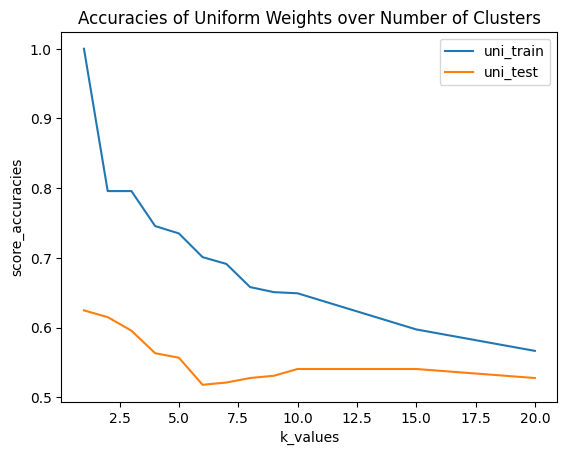

In [6]:
plt.plot(k,uni_train, label='uni_train')
plt.plot(k, uni_test, label='uni_test')

plt.xlabel('k_values')
plt.ylabel('score_accuracies')
plt.title('Accuracies of Uniform Weights over Number of Clusters')
plt.legend()

In [7]:
k = [1,2,3,4,5,6,7,8,9,10,15,20]
dist_train = []
dist_test = []
for n in k:
  neigh = KNeighborsClassifier(weights='distance', n_neighbors=n)
  neigh.fit(X_train, y_train)
  dist_train.append(neigh.score(X_train, y_train))
  dist_test.append(neigh.score(X_test, y_test))


In [8]:
uni_df =  pd.DataFrame({'k_value': k, 'Distance Train': dist_train, 'Distance Test':dist_test})
uni_df

,k_value,Distance Train,Distance Test
0,1,1.0,0.624595
1,2,1.0,0.624595
2,3,1.0,0.608414
3,4,1.0,0.585761
4,5,1.0,0.582524
5,6,1.0,0.579288
6,7,1.0,0.588997
7,8,1.0,0.585761
8,9,1.0,0.592233
9,10,1.0,0.592233


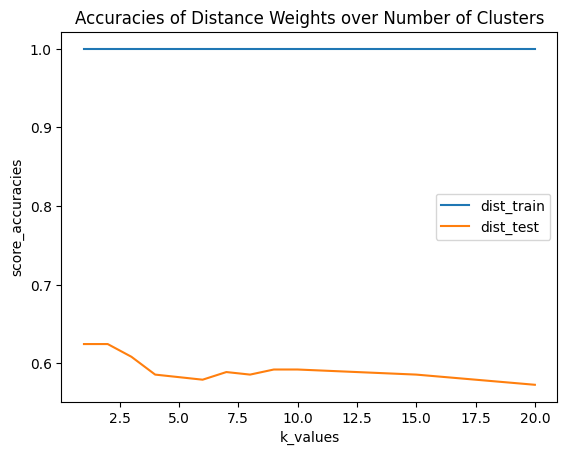

In [9]:
plt.plot(k, dist_train, label='dist_train')
plt.plot(k, dist_test, label='dist_test')

plt.xlabel('k_values')
plt.ylabel('score_accuracies')
plt.title('Accuracies of Distance Weights over Number of Clusters')
plt.legend()

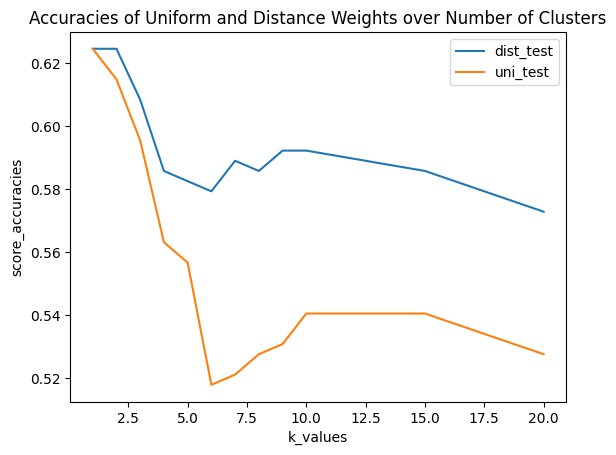

In [10]:
plt.plot(k,dist_test, label='dist_test')
plt.plot(k, uni_test, label='uni_test')

plt.xlabel('k_values')
plt.ylabel('score_accuracies')
plt.title('Accuracies of Uniform and Distance Weights over Number of Clusters')
plt.legend()